## Basic data visualization and analysis of the collected dataset

In [ ]:
import numpy as np
import torch
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
torch.manual_seed(2)

path_x = 'data/LiDAR_MovingObstaclesNoRules.csv'
path_y = 'data/risk_MovingObstaclesNoRules.csv'

: 

In [5]:
X = np.loadtxt(path_x)
X = X/150

Y = pd.read_csv(path_y, delimiter=r"\s+", header=None, names=[i for i in range(8)]) # assume a maximum number of 5 obstacles at a time
Y = Y.max(axis=1)

print("X shape", X.shape)
print("Y shape", Y.shape, "Y max/min", np.max(Y), np.min(Y))

X shape (10075, 180)
Y shape (10075,) Y max/min 0.997447781353844 0.0


In [6]:
order = np.linspace(0,1,X.shape[0])
print(order)

[0.00000000e+00 9.92654358e-05 1.98530872e-04 ... 9.99801469e-01
 9.99900735e-01 1.00000000e+00]


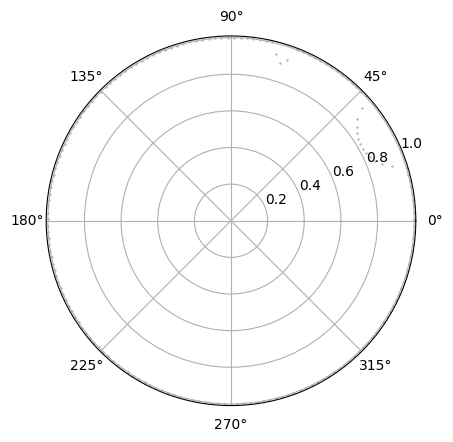

In [12]:
# Data visualization
angles = np.linspace(0, 2*np.pi, 180) - np.pi / 2

# Create a circular test plot to represent a single top-down view of the range data
fig = plt.figure()
ax = fig.add_subplot(projection='polar')
ax.scatter(angles, X[50], s=0.1)
plt.show()

 i = 149

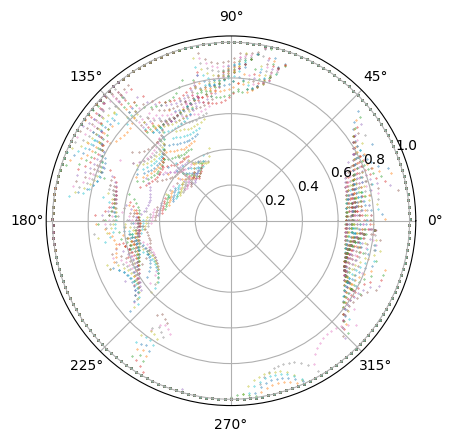

In [14]:
# Now do it for a sequence of the data
fig = plt.figure()
ax = fig.add_subplot(projection='polar')

# This takes a little while
for i, row in enumerate(X[50:200]):
    print("\r i =", i, end="", flush=True)
    ax.scatter(angles, row, s=0.1)

plt.show()

In [ ]:
# And for all the data (this takes a little while
fig = plt.figure()
ax = fig.add_subplot(projection='polar')

# This takes a little while
for i, row in enumerate(X):
    print("\r i =", i, end="", flush=True)
    ax.scatter(angles, row, s=0.1)

plt.show()

 i = 2632141 162 181 196 277 295 298 312 326 329 494 726 727 1008 1024 1025 1051 1056 1072 1107 1120 1121 1263 1284 1289 1293 1301 1796 1799 1804 2113 2208 2217 2226 2230 2270 2274 2275 2279 2281 2289 2451 2504 2596

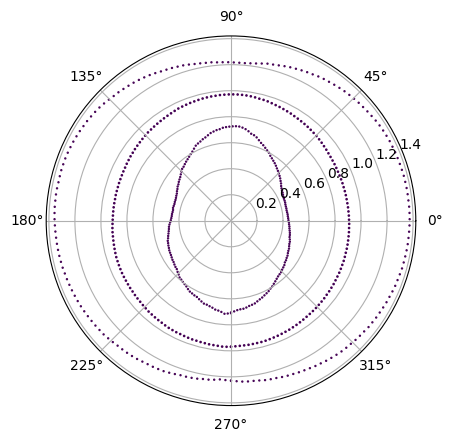

In [15]:
# Statistics
X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0)

fig = plt.figure()
ax = fig.add_subplot(projection='polar')

# Plot a 95% confidence interval
ax.scatter(angles, X_mean, s=0.8, c=0.5*np.ones(X_mean.shape))
ax.scatter(angles, X_mean + 2*X_std, s=0.5, c=0.9*np.ones(X_mean.shape))
ax.scatter(angles, X_mean - 2*X_std, s=0.5, c=0.1*np.ones(X_mean.shape))

plt.show()